<a href="https://colab.research.google.com/github/merucode/RL/blob/92-Project-Trader-Custom_environment/01_Creating_a_Gym_Environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1. Install Dependency

In [1]:
!git clone -b 92-Project-Trader-Custom_environment https://github.com/merucode/RL.git
!cd RL && mv * ../

Cloning into 'RL'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 89 (delta 3), reused 0 (delta 0), pack-reused 80
Receiving objects: 100% (89/89), 198.68 KiB | 1.06 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [2]:
!pip install -e trader_world

Obtaining file:///content/trader_world
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 710.3/710.3 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 50.9 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.26.0-py3-none-any.whl size=826274 sha256=3a53edcb3b4dd4dddefeeb7890712162f42e83991d366f8a3a418e98ba96a0f6
  Stored in directory: /root/.cache/pip/wheels/cd/da/7c/a034980e59e34687bfb6cfa3a5f3e9b389264a0c59519c59fa
Successfully built gym
  Attempting uninstall: pygame
    Found existing installation: pygame 2.5.0
    Uninstalling pygame-2.5.0:
      Successfully uninstalled pygame-2.5.0
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
  Running setup.py develop for trader-world
ERROR: p

### NOTE: After inistall gym-examples, Restart runtime

In [1]:
import time
import matplotlib.pyplot as plt
import gym

In [2]:
env = gym.make("trader_world:TraderWorld-v0", render_mode="rgb_array")

In [3]:
env.reset()

({'agent': array([0, 1]), 'target': array([2, 0])}, {'distance': 3.0})

In [8]:
action = env.action_space.sample()
env.step(0)

({'agent': array([3, 1]), 'target': array([2, 0])},
 0,
 False,
 False,
 {'distance': 2.0})

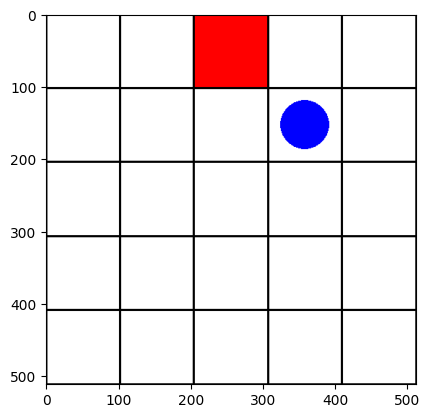

In [9]:
img = env.render()
plt.figure()
plt.imshow(img)

# STEP 2. trader_world.py



In [ ]:
import gym
from gym import spaces
import pygame
import numpy as np

"""
    ### Parameter
    * df : Series trade pd.DataFrame witch consist of ohlcv columns(open, high, low, close, volume)
         : It is Sorted by time ascending order
    * obs_len : What want to observate lenth from df

    ### Argument

    ### Method

    ### Action Space

    | Num | Action                                                            |
    | --- | ----------------------------------------------------------------- |
    | 0   | Hold                                                              |
    | 1   | Buy coin and sell coin after 1 step                               |
    | 2   | Buy coin and sell coin after 2 step                               |
    ...

    ### Observation Space
    The observation space is a `Box(0, np.inf, (self.obs_len, 4), int)`. Each Num mean 1-dimension number
    | Num | Observation                                                  | Min    | Max    |
    |-----|--------------------------------------------------------------|--------|--------|
    | 0   | open                                                         | 0      | Inf    |
    | 1   | high                                                         | 0      | Inf    |
    | 2   | low                                                          | 0      | Inf    |
    | 3   | close                                                        | 0      | Inf    |
    | 4   | volume                                                       | 0      | Inf    |

    ### Reward
"""

class TraderWorldEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}

    def __init__(self, df, obs_len, render_mode=None):
        self.df = df
        self.lst_ohlcv = self.df_to_lst(self.df)
        self.obs_len = obs_len
        self.window_size_x = 900    # The size of the PyGame window
        self.window_size_y = 1500

        # Observations are ohlcv data with obeservation lenth
        self.observation_space = spaces.Box(0, np.Inf, shape=(self.obs_len, 5), dtype=int)

        # We have 10 actions(each action is differe)
        self.action_space = spaces.Discrete(10)


        # """
        # The following dictionary maps abstract actions from `self.action_space` to
        # the direction we will walk in if that action is taken.
        # I.e. 0 corresponds to "right", 1 to "up" etc.
        # """
        # self._action_to_direction = {
        #     0: np.array([1, 0]),
        #     1: np.array([0, 1]),
        #     2: np.array([-1, 0]),
        #     3: np.array([0, -1]),
        # }

        assert render_mode is None or render_mode in self.metadata["render_modes"]
        self.render_mode = render_mode

        """
        If human-rendering is used, `self.window` will be a reference
        to the window that we draw to. `self.clock` will be a clock that is used
        to ensure that the environment is rendered at the correct framerate in
        human-mode. They will remain `None` until human-mode is used for the
        first time.
        """
        self.window = None
        self.clock = None


    def _get_obs(self):

        return self.lst_ohlcv[self.time_step:self.time_step + self.obs_len]

    # def _get_info(self):
    #     return {"distance": np.linalg.norm(self._agent_location - self._target_location, ord=1)}


    def reset(self, seed=None, options=None):
        # We need the following line to seed self.np_random
        super().reset(seed=seed)
        self.time_step = 0


        # Choose the agent's location uniformly at random
        #self._agent_location = self.np_random.integers(0, self.size, size=2, dtype=int)

        # We will sample the target's location randomly until it does not coincide with the agent's location
        # self._target_location = self._agent_location
        # while np.array_equal(self._target_location, self._agent_location):
        #     self._target_location = self.np_random.integers(
        #         0, self.size, size=2, dtype=int
        #     )

        observation = self._get_obs()
        #info = self._get_info()

        if self.render_mode == "human":
            self._render_frame()

        return observation


    def step(self, action):
        # Map the action (element of {0,1,2,3}) to the direction we walk in
        # direction = self._action_to_direction[action]
        # # We use `np.clip` to make sure we don't leave the grid
        # self._agent_location = np.clip(
        #     self._agent_location + direction, 0, self.size - 1
        # )
        # An episode is done iff the agent has reached the target
        terminated = 0
        # = np.array_equal(self._agent_location, self._target_location)
        reward = 0
        # 1 if terminated else 0  # Binary sparse rewards
        observation = self._get_obs()
        # info = self._get_info()

        if self.render_mode == "human":
            self._render_frame()

        self.time_step += 1
        return observation, reward, terminated, False, {}


    def render(self):
        if self.render_mode == "rgb_array":
            return self._render_frame()

    def _render_frame(self):
        if self.window is None and self.render_mode == "human":
            pygame.init()
            pygame.display.init()
            self.window = pygame.display.set_mode((self.window_size_x, self.window_size_y))
        if self.clock is None and self.render_mode == "human":
            self.clock = pygame.time.Clock()

        canvas = pygame.Surface((self.window_size_x, self.window_size_y))
        canvas.fill((255, 255, 255))
        # pix_square_size = (
        #     self.window_size / self.size
        # )  # The size of a single grid square in pixels

        # # First we draw the target
        # pygame.draw.rect(
        #     canvas,
        #     (255, 0, 0),
        #     pygame.Rect(
        #         pix_square_size * self._target_location,
        #         (pix_square_size, pix_square_size),
        #     ),
        # )
        # # Now we draw the agent
        # pygame.draw.circle(
        #     canvas,
        #     (0, 0, 255),
        #     (self._agent_location + 0.5) * pix_square_size,
        #     pix_square_size / 3,
        # )

        # # Finally, add some gridlines
        # for x in range(self.size + 1):
        #     pygame.draw.line(
        #         canvas,
        #         0,
        #         (0, pix_square_size * x),
        #         (self.window_size, pix_square_size * x),
        #         width=3,
        #     )
        #     pygame.draw.line(
        #         canvas,
        #         0,
        #         (pix_square_size * x, 0),
        #         (pix_square_size * x, self.window_size),
        #         width=3,
        #     )

        if self.render_mode == "human":
            # The following line copies our drawings from `canvas` to the visible window
            self.window.blit(canvas, canvas.get_rect())
            pygame.event.pump()
            pygame.display.update()

            # We need to ensure that human-rendering occurs at the predefined framerate.
            # The following line will automatically add a delay to keep the framerate stable.
            self.clock.tick(self.metadata["render_fps"])
        else:  # rgb_array
            return np.transpose(
                np.array(pygame.surfarray.pixels3d(canvas)), axes=(1, 0, 2)
            )


    def close(self):
        if self.window is not None:
            pygame.display.quit()
            pygame.quit()

    def df_to_lst(self, df):
        lst = []
        for i in range(len(df)):
            lst.append(df.iloc[i].tolist())
        return lst

# STEP 3. Test Code

In [ ]:
!pip install pykrx

In [5]:
!pip install -e trader_world

Obtaining file:///content/trader_world
  Preparing metadata (setup.py) ... done
  Attempting uninstall: trader-world
    Found existing installation: trader-world 0.0.1
    Uninstalling trader-world-0.0.1:
      Successfully uninstalled trader-world-0.0.1
  Running setup.py develop for trader-world


After install env, Restart runtime

In [1]:
### Ready data
from pykrx import stock
import pandas as pd

df = stock.get_market_ohlcv("20210720", "20221010", "005930")
df = df[df.columns.tolist()[:-1]]
df.columns = ['open', 'high', 'low', 'close', 'volume']

df = df.reset_index(drop=True)
print(df.head(3))

    open   high    low  close    volume
0  78500  79000  78400  79000  12456646
1  79000  79100  78500  78500  12355296
2  79000  79800  78900  79700  12618790


In [2]:
import time
import matplotlib.pyplot as plt
import gym

env = gym.make("trader_world:TraderWorld-v0", df=df, obs_len=30, render_mode="rgb_array")

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (30, 5)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
env.reset()

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:137: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:226: UserWarning: WARN: Casting input x to numpy array.
  logger.warn("Casting input x to numpy array.")


[[78500, 79000, 78400, 79000, 12456646],
 [79000, 79100, 78500, 78500, 12355296],
 [79000, 79800, 78900, 79700, 12618790],
 [79700, 79900, 79200, 79300, 9098910],
 [79400, 79500, 78800, 78800, 10040975],
 [79200, 79400, 78500, 78500, 11427693],
 [78300, 79200, 78100, 79200, 12743417],
 [78800, 79400, 78800, 79000, 14360453],
 [78900, 78900, 78500, 78500, 13823411],
 [79200, 79500, 78700, 79300, 11739124],
 [79400, 81400, 79300, 81400, 24339360],
 [82200, 83100, 81800, 82900, 25642368],
 [83300, 83300, 82000, 82100, 18485469],
 [81900, 82500, 81300, 81500, 13342623],
 [81500, 82300, 80900, 81500, 15522581],
 [82300, 82400, 80100, 80200, 20362639],
 [79600, 79800, 78500, 78500, 30241137],
 [77100, 78200, 76900, 77000, 42365223],
 [75800, 76000, 74100, 74400, 61270643],
 [74000, 75100, 74000, 74200, 30944847],
 [73900, 74600, 73100, 73900, 29192631],
 [73500, 74400, 73100, 73100, 22166298],
 [73500, 73900, 72500, 72700, 22364803],
 [73300, 74000, 73000, 73300, 19384648],
 [73900, 75700, 7

In [12]:
env.action_space, env.observation_space

(Discrete(10), Box(0, 9223372036854775805, (30, 5), int64))

In [10]:
action = env.action_space.sample()
action

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7

In [7]:
obs, reward, done, _ = env.step(1)
env.step(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


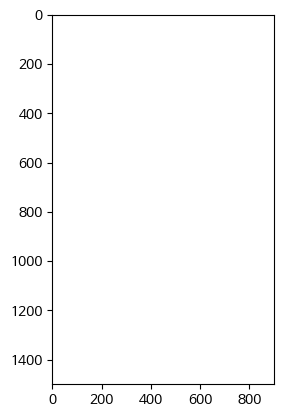

In [8]:
img = env.render()
plt.figure()
plt.imshow(img)

# Appendix. B/U gird_world.py

In [ ]:
import gym
from gym import spaces
import pygame
import numpy as np


class GridWorldEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}

    def __init__(self, render_mode=None, size=5):
        self.size = size        # The size of the square grid
        self.window_size = 512  # The size of the PyGame window

        # Observations are dictionaries with the agent's and the target's location.
        # Each location is encoded as an element of {0, ..., `size`}^2, i.e. MultiDiscrete([size, size]).
        self.observation_space = spaces.Dict(
            {
                "agent": spaces.Box(0, size - 1, shape=(2,), dtype=int),
                "target": spaces.Box(0, size - 1, shape=(2,), dtype=int),
            }
        )

        # We have 4 actions, corresponding to "right", "up", "left", "down"
        self.action_space = spaces.Discrete(4)

        """
        The following dictionary maps abstract actions from `self.action_space` to
        the direction we will walk in if that action is taken.
        I.e. 0 corresponds to "right", 1 to "up" etc.
        """
        self._action_to_direction = {
            0: np.array([1, 0]),
            1: np.array([0, 1]),
            2: np.array([-1, 0]),
            3: np.array([0, -1]),
        }

        assert render_mode is None or render_mode in self.metadata["render_modes"]
        self.render_mode = render_mode

        """
        If human-rendering is used, `self.window` will be a reference
        to the window that we draw to. `self.clock` will be a clock that is used
        to ensure that the environment is rendered at the correct framerate in
        human-mode. They will remain `None` until human-mode is used for the
        first time.
        """
        self.window = None
        self.clock = None


    def _get_obs(self):
        return {"agent": self._agent_location, "target": self._target_location}

    def _get_info(self):
        return {"distance": np.linalg.norm(self._agent_location - self._target_location, ord=1)}


    def reset(self, seed=None, options=None):
        # We need the following line to seed self.np_random
        super().reset(seed=seed)

        # Choose the agent's location uniformly at random
        self._agent_location = self.np_random.integers(0, self.size, size=2, dtype=int)

        # We will sample the target's location randomly until it does not coincide with the agent's location
        self._target_location = self._agent_location
        while np.array_equal(self._target_location, self._agent_location):
            self._target_location = self.np_random.integers(
                0, self.size, size=2, dtype=int
            )

        observation = self._get_obs()
        info = self._get_info()

        if self.render_mode == "human":
            self._render_frame()

        return observation, info


    def step(self, action):
        # Map the action (element of {0,1,2,3}) to the direction we walk in
        direction = self._action_to_direction[action]
        # We use `np.clip` to make sure we don't leave the grid
        self._agent_location = np.clip(
            self._agent_location + direction, 0, self.size - 1
        )
        # An episode is done iff the agent has reached the target
        terminated = np.array_equal(self._agent_location, self._target_location)
        reward = 1 if terminated else 0  # Binary sparse rewards
        observation = self._get_obs()
        info = self._get_info()

        if self.render_mode == "human":
            self._render_frame()

        return observation, reward, terminated, False, info


    def render(self):
        if self.render_mode == "rgb_array":
            return self._render_frame()

    def _render_frame(self):
        if self.window is None and self.render_mode == "human":
            pygame.init()
            pygame.display.init()
            self.window = pygame.display.set_mode((self.window_size, self.window_size))
        if self.clock is None and self.render_mode == "human":
            self.clock = pygame.time.Clock()

        canvas = pygame.Surface((self.window_size, self.window_size))
        canvas.fill((255, 255, 255))
        pix_square_size = (
            self.window_size / self.size
        )  # The size of a single grid square in pixels

        # First we draw the target
        pygame.draw.rect(
            canvas,
            (255, 0, 0),
            pygame.Rect(
                pix_square_size * self._target_location,
                (pix_square_size, pix_square_size),
            ),
        )
        # Now we draw the agent
        pygame.draw.circle(
            canvas,
            (0, 0, 255),
            (self._agent_location + 0.5) * pix_square_size,
            pix_square_size / 3,
        )

        # Finally, add some gridlines
        for x in range(self.size + 1):
            pygame.draw.line(
                canvas,
                0,
                (0, pix_square_size * x),
                (self.window_size, pix_square_size * x),
                width=3,
            )
            pygame.draw.line(
                canvas,
                0,
                (pix_square_size * x, 0),
                (pix_square_size * x, self.window_size),
                width=3,
            )

        if self.render_mode == "human":
            # The following line copies our drawings from `canvas` to the visible window
            self.window.blit(canvas, canvas.get_rect())
            pygame.event.pump()
            pygame.display.update()

            # We need to ensure that human-rendering occurs at the predefined framerate.
            # The following line will automatically add a delay to keep the framerate stable.
            self.clock.tick(self.metadata["render_fps"])
        else:  # rgb_array
            return np.transpose(
                np.array(pygame.surfarray.pixels3d(canvas)), axes=(1, 0, 2)
            )


    def close(self):
        if self.window is not None:
            pygame.display.quit()
            pygame.quit()